# Itemization Clustering
Cluster customers into groups based on what products they usually order.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scripts import product_processing, order_clustering

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', 400)

## Load Data

In [2]:
product_groups_path = '../data/product_groups.csv'
items_path = '../data/items.csv'
save_path = '../data/clustered_orders.csv'

load_model = '../data/models/orders_clf.pkl'

In [3]:
pd.read_csv(items_path).shape

(556792, 8)

Make sure that the latest products are grouped to their according product types

In [4]:
product_processing.group_products('../data/products.csv', '../data/product_types.csv', product_groups_path)

Writing grouped products to ../data/product_groups.csv


## Cluster orders based on product_types

Evaluate number of cluster centers:

In [5]:
kmeans, df_clusters, df_centers = order_clustering.cluster_orders(
    items_path, product_groups_path, save_path, load_model_path=load_model)

In [6]:
df_clusters.order_id.nunique()

240305

## Plot centers

In [7]:
df_centers = df_centers.set_index('cluster_name', drop=True)

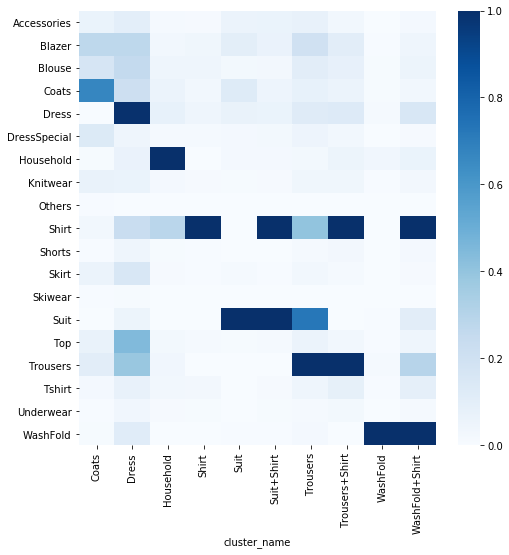

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_centers.sort_index().T, cmap='Blues')

## Customers clusters

In [9]:
df = pd.read_csv('../data/order_churn_data.csv')

In [12]:
df.loc[~df.cluster.isnull()].shape

(234837, 64)

In [15]:
df.cluster_name.value_counts().sort_index().reset_index()

,index,cluster_name
0,Coats,11990
1,Dress,16314
2,Household,10830
3,Shirt,62785
4,Suit,17919
5,Suit+Shirt,19965
6,Trousers,13000
7,Trousers+Shirt,22502
8,WashFold,41647
9,WashFold+Shirt,17885


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

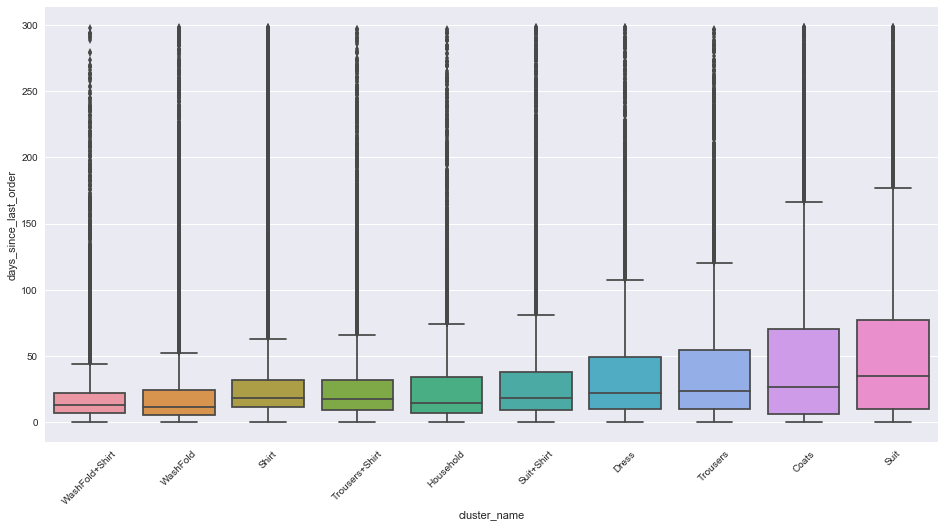

In [16]:
fig = plt.figure(figsize=(16,8))
sns.set()

mask = (df.days_since_last_order < 300)

sorting = df.loc[mask].groupby('cluster_name').days_since_last_order.quantile(.75).sort_values().index
sns.categorical.boxplot(data=df.loc[mask], x='cluster_name', y='days_since_last_order', order=sorting)

plt.xticks(rotation=45)

In [ ]:
df.groupby('cluster_name').days_since_last_order.describe()

In [ ]:
df.order_id.nunique()